In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import time
from scipy import stats
from scipy.stats import zscore
import random
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import itertools
from typing import List
import time
from scipy import stats
from scipy.stats import zscore
import random
import sys

In [2]:
df=pd.read_csv('final.csv',index_col=0)

C:\Users\zhuiy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,cardnum_merch,cardnum_zip,cardnum_state,merchnum_zip,merchnum_state,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,cardnum_merch_day_since,cardnum_merch_count_0,cardnum_merch_avg_0,cardnum_merch_max_0,cardnum_merch_med_0,cardnum_merch_total_0,cardnum_merch_actual/avg_0,cardnum_merch_actual/max_0,cardnum_merch_actual/med_0,cardnum_merch_actual/toal_0,cardnum_merch_count_1,cardnum_merch_avg_1,cardnum_merch_max_1,cardnum_merch_med_1,cardnum_merch_total_1,cardnum_merch_actual/avg_1,cardnum_merch_actual/max_1,cardnum_merch_actual/med_1,cardnum_merch_actual/toal_1,cardnum_merch_count_3,cardnum_merch_avg_3,cardnum_merch_max_3,cardnum_merch_med_3,cardnum_merch_total_3,cardnum_merch_actual/avg_3,cardnum_merch_actual/max_3,cardnum_merch_actual/med_3,cardnum_merch_actual/toal_3,cardnum_merch_count_7,cardnum_merch_avg_7,cardnum_merch_max_7,cardnum_merch_med_7,cardnum_merch_total_7,cardnum_merch_actual/avg_7,cardnum_merch_actual/max_7,cardnum_merch_actual/med_7,cardnum_merch_actual/toal_7,cardnum_merch_count_14,cardnum_merch_avg_14,cardnum_merch_max_14,cardnum_merch_med_14,cardnum_merch_total_14,cardnum_merch_actual/avg_14,cardnum_merch_actual/max_14,cardnum_merch_actual/med_14,cardnum_merch_actual/toal_14,cardnum_merch_count_30,cardnum_merch_avg_30,cardnum_merch_max_30,cardnum_merch_med_30,cardnum_merch_total_30,cardnum_merch_actual/avg_30,cardnum_merch_actual/max_30,cardnum_merch_actual/med_30,cardnum_merch_actual/toal_30,cardnum_zip_day_since,cardnum_zip_count_0,cardnum_zip_avg_0,cardnum_zip_max_0,cardnum_zip_med_0,cardnum_zip_total_0,cardnum_zip_actual/avg_0,cardnum_zip_actual/max_0,cardnum_zip_actual/med_0,cardnum_zip_actual/toal_0,cardnum_zip_count_1,cardnum_zip_avg_1,cardnum_zip_max_1,cardnum_zip_med_1,cardnum_zip_total_1,cardnum_zip_actual/avg_1,cardnum_zip_actual/max_1,cardnum_zip_actual/med_1,cardnum_zip_actual/toal_1,cardnum_zip_count_3,cardnum_zip_avg_3,cardnum_zip_max_3,cardnum_zip_med_

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96396
Columns: 442 entries, Recnum to merchnum_state_count_1_by_30
dtypes: float64(386), int64(45), object(11)
memory usage: 325.8+ MB


In [5]:
df.columns.get_loc('Cardnum_day_since')

15

In [6]:
df_prepare = pd.concat([df[['Fraud']], df.iloc[:,15:]], axis = 1)
df_prepare

,Fraud,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,cardnum_merch_day_since,cardnum_merch_count_0,cardnum_merch_avg_0,cardnum_merch_max_0,cardnum_merch_med_0,cardnum_merch_total_0,cardnum_merch_actual/avg_0,cardnum_merch_actual/max_0,cardnum_merch_actual/med_0,cardnum_merch_actual/toal_0,cardnum_merch_count_1,cardnum_merch_avg_1,cardnum_merch_max_1,cardnum_merch_med_1,cardnum_merch_total_1,cardnum_merch_actual/avg_1,cardnum_merch_actual/max_1,cardnum_merch_actual/med_1,cardnum_merch_actual/toal_1,cardnum_merch_count_3,cardnum_merch_avg_3,cardnum_merch_max_3,cardnum_merch_med_3,cardnum_merch_total_3,cardnum_merch_actual/avg_3,cardnum_merch_actual/max_3,cardnum_merch_actual/med_3,cardnum_merch_actual/toal_3,cardnum_merch_count_7,cardnum_merch_avg_7,cardnum_merch_max_7,cardnum_merch_med_7,cardnum_merch_total_7,cardnum_merch_actual/avg_7,cardnum_merch_actual/max_7,cardnum_merch_actual/med_7,cardnum_merch_actual/toal_7,cardnum_merch_count_14,cardnum_merch_avg_14,cardnum_merch_max_14,cardnum_merch_med_14,cardnum_merch_total_14,cardnum_merch_actual/avg_14,cardnum_merch_actual/max_14,cardnum_merch_actual/med_14,cardnum_merch_actual/toal_14,cardnum_merch_count_30,cardnum_merch_avg_30,cardnum_merch_max_30,cardnum_merch_med_30,cardnum_merch_total_30,cardnum_merch_actual/avg_30,cardnum_merch_actual/max_30,cardnum_merch_actual/med_30,cardnum_merch_actual/toal_30,cardnum_zip_day_since,cardnum_zip_count_0,cardnum_zip_avg_0,cardnum_zip_max_0,cardnum_zip_med_0,cardnum_zip_total_0,cardnum_zip_actual/avg_0,cardnum_zip_actual/max_0,cardnum_zip_actual/med_0,cardnum_zip_actual/toal_0,cardnum_zip_count_1,cardnum_zip_avg_1,cardnum_zip_max_1,cardnum_zip_med_1,cardnum_zip_total_1,cardnum_zip_actual/avg_1,cardnum_zip_actual/max_1,cardnum_zip_actual/med_1,cardnum_zip_actual/toal_1,cardnum_zip_count_3,cardnum_zip_avg_3,cardnum_zip_max_3,cardnum_zip_med_3,cardnum_zip_total_3,cardnum_zip_actual/avg_3,cardnum_zip_actual/max_3,cardnum_zip_actual/med_3,cardnum_zip_actual/toal_3,cardnum_zip_count_7,cardnum_zip

In [7]:
# z-scale the numerical variables
df_modeling_zscale = df_prepare.apply(zscore)
df_modeling_zscale['Fraud'] = df_prepare['Fraud']

In [8]:
def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    floats = df.select_dtypes(include=['float64']).columns.tolist()
    df[floats] = df[floats].apply(pd.to_numeric, downcast='float')
    return df


def optimize_ints(df: pd.DataFrame) -> pd.DataFrame:
    ints = df.select_dtypes(include=['int64']).columns.tolist()
    df[ints] = df[ints].apply(pd.to_numeric, downcast='integer')
    return df


def optimize_objects(df: pd.DataFrame, datetime_features: List[str]) -> pd.DataFrame:
    for col in df.select_dtypes(include=['object']):
        if col not in datetime_features:
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if float(num_unique_values) / num_total_values < 0.5:
                df[col] = df[col].astype('category')
        else:
            df[col] = pd.to_datetime(df[col])
    return df



def optimize(df: pd.DataFrame, datetime_features: List[str] = []):
    return optimize_floats(optimize_ints(optimize_objects(df, datetime_features)))

In [9]:
df_modeling_zscale = optimize(df_modeling_zscale)
df_modeling_zscale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96396
Columns: 428 entries, Fraud to merchnum_state_count_1_by_30
dtypes: float32(427), int8(1)
memory usage: 157.8 MB


In [10]:
df_oot = df_modeling_zscale.loc[(df['Date'] >= '2010-11-01')]
df_modeling_scaled = df_modeling_zscale.loc[((df['Date'] < '2010-11-01') & (df['Date'] > '2010-01-14'))]

In [11]:
#df_oot.to_csv('df_oot.csv')
#df_modeling_scaled.to_csv('df_modeling_scaled.csv')

In [11]:
df_modeling_scaled.head()

,Fraud,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,Cardnum_actual/max_0,Cardnum_actual/med_0,Cardnum_actual/toal_0,Cardnum_count_1,Cardnum_avg_1,Cardnum_max_1,Cardnum_med_1,Cardnum_total_1,Cardnum_actual/avg_1,Cardnum_actual/max_1,Cardnum_actual/med_1,Cardnum_actual/toal_1,Cardnum_count_3,Cardnum_avg_3,Cardnum_max_3,Cardnum_med_3,Cardnum_total_3,Cardnum_actual/avg_3,Cardnum_actual/max_3,Cardnum_actual/med_3,Cardnum_actual/toal_3,Cardnum_count_7,Cardnum_avg_7,Cardnum_max_7,Cardnum_med_7,Cardnum_total_7,Cardnum_actual/avg_7,Cardnum_actual/max_7,Cardnum_actual/med_7,Cardnum_actual/toal_7,Cardnum_count_14,Cardnum_avg_14,Cardnum_max_14,Cardnum_med_14,Cardnum_total_14,Cardnum_actual/avg_14,Cardnum_actual/max_14,Cardnum_actual/med_14,Cardnum_actual/toal_14,Cardnum_count_30,Cardnum_avg_30,Cardnum_max_30,Cardnum_med_30,Cardnum_total_30,Cardnum_actual/avg_30,Cardnum_actual/max_30,Cardnum_actual/med_30,Cardnum_actual/toal_30,Merchnum_day_since,Merchnum_count_0,Merchnum_avg_0,Merchnum_max_0,Merchnum_med_0,Merchnum_total_0,Merchnum_actual/avg_0,Merchnum_actual/max_0,Merchnum_actual/med_0,Merchnum_actual/toal_0,Merchnum_count_1,Merchnum_avg_1,Merchnum_max_1,Merchnum_med_1,Merchnum_total_1,Merchnum_actual/avg_1,Merchnum_actual/max_1,Merchnum_actual/med_1,Merchnum_actual/toal_1,Merchnum_count_3,Merchnum_avg_3,Merchnum_max_3,Merchnum_med_3,Merchnum_total_3,Merchnum_actual/avg_3,Merchnum_actual/max_3,Merchnum_actual/med_3,Merchnum_actual/toal_3,Merchnum_count_7,Merchnum_avg_7,Merchnum_max_7,Merchnum_med_7,Merchnum_total_7,Merchnum_actual/avg_7,Merchnum_actual/max_7,Merchnum_actual/med_7,Merchnum_actual/toal_7,Merchnum_count_14,Merchnum_avg_14,Merchnum_max_14,Merchnum_med_14,Merchnum_total_14,Merchnum_actual/avg_14,Merchnum_actual/max_14,Merchnum_actual/med_14,Merchnum_actual/toal_14,Merchnum_count_30,Merchnum_avg_30,Merchnum_max_30,Merchnum_med_30,Merchnum_total_30,Merchnum_actual/avg_30,Merchnum_actual/max_30,Merchnum_actual/med_30,Merchnum_actual/toal_30,cardnum_merch_day_since,cardnum_merch_count_0,cardnum_merch_avg_0,cardnum_merch_max_0,cardnum_merch_med_0,cardnum_merch_total_0,cardnum_merch_actual/avg_0,cardnum_merch_actual/max_0,cardnum_merch_actual/med_0,cardnum_merch_actual/toal_0,cardnum_merch_count_1,cardnum_merch_avg_1,cardnum_merch_max_1,cardnum_merch_med_1,cardnum_merch_total_1,cardnum_merch_actual/avg_1,cardnum_merch_actual/max_1,cardnum_merch_actual/med_1,cardnum_merch_actual/toal_1,cardnum_merch_count_3,cardnum_merch_avg_3,cardnum_merch_max_3,cardnum_merch_med_3,cardnum_merch_total_3,cardnum_merch_actual/avg_3,cardnum_merch_actual/max_3,cardnum_merch_actual/med_3,cardnum_merch_actual/toal_3,cardnum_merch_count_7,cardnum_merch_avg_7,cardnum_merch_max_7,cardnum_merch_med_7,cardnum_merch_total_7,cardnum_merch_actual/avg_7,cardnum_merch_actual/max_7,cardnum_merch_actual/med_7,cardnum_merch_actual/toal_7,cardnum_merch_count_14,cardnum_merch_avg_14,cardnum_merch_max_14,cardnum_merch_med_14,cardnum_merch_total_14,cardnum_merch_actual/avg_14,cardnum_merch_actual/max_14,cardnum_merch_actual/med_14,cardnum_merch_actual/toal_14,cardnum_merch_count_30,cardnum_merch_avg_30,cardnum_merch_max_30,cardnum_merch_med_30,cardnum_merch_total_30,cardnum_merch_actual/avg_30,cardnum_merch_actual/max_30,cardnum_merch_actual/med_30,cardnum_merch_actual/toal_30,cardnum_zip_day_since,cardnum_zip_count_0,cardnum_zip_avg_0,cardnum_zip_max_0,cardnum_zip_med_0,cardnum_zip_total_0,cardnum_zip_actual/avg_0,cardnum_zip_actual/max_0,cardnum_zip_actual/med_0,cardnum_zip_actual/toal_0,cardnum_zip_count_1,cardnum_zip_avg_1,cardnum_zip_max_1,cardnum_zip_med_1,cardnum_zip_total_1,cardnum_zip_actual/avg_1,cardnum_zip_actual/max_1,cardnum_zip_actual/med_1,cardnum_zip_actual/toal_1,cardnum_zip_count_3,cardnum_zip_avg_3,cardnum_zip_max_3,cardnum_zip_med_3,cardnum_zip_total_3,cardnum_zip_actual/avg_3,cardnum_zip_actual/max_3,cardnum_zip_actual/med_3,cardnum_zip_actual/toal_3,cardnum_zip_count_7,cardnum_zip

In [12]:
data = deepcopy(df_modeling_scaled)

In [13]:
good_ind = np.where(data['Fraud'] == 0)
bad_ind = np.where(data['Fraud'] == 1)
good = data.iloc[good_ind]
bad = data.iloc[bad_ind]

In [15]:
KSFDR = np.zeros([2, data.shape[1]])
numbads = data['Fraud'].sum()
topRows = int(round(len(data)*0.03))
print('Top 3% rows:',topRows)
print('No of frauds',numbads)

start_time = pd.datetime.now()

j = 0
for column in data:
#     KS statistic
    KSFDR[0][j] = stats.ks_2samp(good[column],bad[column])[0]
#     FDR
    temp = data.sort_values(column,ascending=False)
    temp1 = temp.head(topRows)
    temp2 = temp.tail(topRows)
    needed1 = temp1.loc[:,'Fraud']
    needed2 = temp2.loc[:,'Fraud']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1,FDR2)
    KSFDR[1][j] = FDRate
    j = j +1
print('duration: ', pd.datetime.now() - start_time)

Top 3% rows: 2419
No of frauds 868


<ipython-input-15-ac57625550ba>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_time = pd.datetime.now()


duration:  0:00:55.554424


<ipython-input-15-ac57625550ba>:24: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print('duration: ', pd.datetime.now() - start_time)


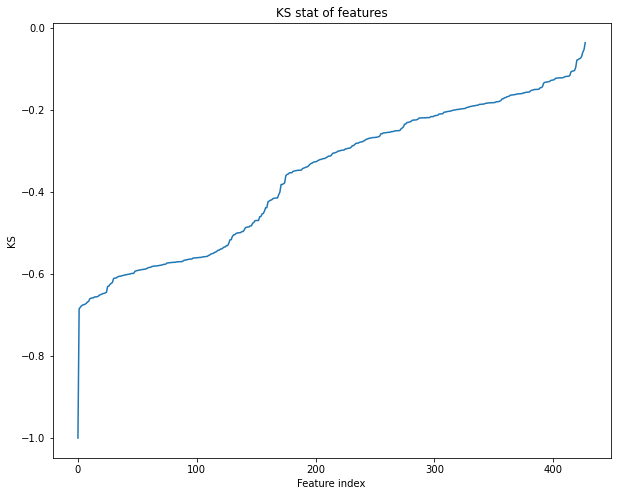

In [16]:
plt.figure(figsize=(10,8))
plt.plot(np.sort(-KSFDR[0][:]))
plt.title("KS stat of features")
plt.ylabel('KS')
plt.xlabel('Feature index')
# plt.savefig("KS_HW5.png", dpi=200)
plt.show()

In [17]:
col_name_red = data.columns
res_df_prof = pd.DataFrame.from_dict({'KS':KSFDR[0][:],'FDR':KSFDR[1][:]},orient='index',
                       columns=col_name_red)

In [18]:
res_df_prof = res_df_prof.transpose()
res_df_prof['Avg'] = res_df_prof.mean(axis = 1)
res_df_prof['KS Rank'] = res_df_prof['KS'].rank(ascending = False)
res_df_prof['FDR Rank'] = res_df_prof['FDR'].rank(ascending=False)
res_df_prof['Average Rank'] = res_df_prof[['KS Rank','FDR Rank']].mean(axis = 1)
res_df_prof_filter = res_df_prof.sort_values(by='Average Rank',ascending=True)
res_df_prof_filter

,KS,FDR,Avg,KS Rank,FDR Rank,Average Rank
Fraud,1.000000,1.000000,1.000000,1.0,1.0,1.00
cardnum_zip_total_7,0.685118,0.634793,0.659955,2.0,3.0,2.50
cardnum_zip_total_3,0.677772,0.637097,0.657435,4.0,2.0,3.00
cardnum_merch_total_7,0.681401,0.633641,0.657521,3.0,4.0,3.50
cardnum_merch_total_14,0.675820,0.631336,0.653578,5.0,5.5,5.25
cardnum_merch_total_3,0.675293,0.631336,0.653315,6.0,5.5,5.75
cardnum_state_total_3,0.673721,0.627880,0.650801,7.0,7.0,7.00
cardnum_zip_total_14,0.672152,0.625576,0.648864,8.0,8.0,8.00
cardnum_state_total_7,0.668634,0.593318,0.630976,9.0,12.0,10.50
cardnum_state_total_1,0.658750,0.599078,0.628914,13.0,9.0,11.00


In [20]:
#res_df_prof_filter.to_csv('feature selection.csv')

In [19]:
Y_labels = df_modeling_scaled['Fraud']
features_chosen_filter = res_df_prof_filter.index.values[1:81] #1st column is the fraud label
features_chosen_filter

array(['cardnum_zip_total_7', 'cardnum_zip_total_3',
       'cardnum_merch_total_7', 'cardnum_merch_total_14',
       'cardnum_merch_total_3', 'cardnum_state_total_3',
       'cardnum_zip_total_14', 'cardnum_state_total_7',
       'cardnum_state_total_1', 'cardnum_zip_total_1',
       'cardnum_merch_total_1', 'cardnum_merch_total_30',
       'cardnum_state_total_14', 'cardnum_zip_total_30',
       'cardnum_merch_total_0', 'cardnum_state_total_0',
       'cardnum_zip_max_14', 'cardnum_zip_total_0', 'cardnum_zip_max_30',
       'cardnum_state_max_7', 'cardnum_merch_max_14', 'cardnum_zip_max_7',
       'cardnum_state_max_14', 'cardnum_merch_max_30',
       'cardnum_zip_max_3', 'cardnum_merch_max_3', 'Cardnum_total_3',
       'cardnum_merch_max_7', 'cardnum_state_max_3', 'Cardnum_total_7',
       'merchnum_zip_total_1', 'cardnum_merch_max_1', 'cardnum_zip_max_1',
       'cardnum_state_total_30', 'merchnum_state_total_0',
       'cardnum_state_max_30', 'cardnum_state_max_1', 'Merchnum_total

In [20]:
X_data = df_modeling_scaled[features_chosen_filter]
print(X_data.shape)
X_data.head()

(80632, 80)


,cardnum_zip_total_7,cardnum_zip_total_3,cardnum_merch_total_7,cardnum_merch_total_14,cardnum_merch_total_3,cardnum_state_total_3,cardnum_zip_total_14,cardnum_state_total_7,cardnum_state_total_1,cardnum_zip_total_1,cardnum_merch_total_1,cardnum_merch_total_30,cardnum_state_total_14,cardnum_zip_total_30,cardnum_merch_total_0,cardnum_state_total_0,cardnum_zip_max_14,cardnum_zip_total_0,cardnum_zip_max_30,cardnum_state_max_7,cardnum_merch_max_14,cardnum_zip_max_7,cardnum_state_max_14,cardnum_merch_max_30,cardnum_zip_max_3,cardnum_merch_max_3,Cardnum_total_3,cardnum_merch_max_7,cardnum_state_max_3,Cardnum_total_7,merchnum_zip_total_1,cardnum_merch_max_1,cardnum_zip_max_1,cardnum_state_total_30,merchnum_state_total_0,cardnum_state_max_30,cardnum_state_max_1,Merchnum_total_0,merchnum_zip_max_0,merchnum_zip_total_0,merchnum_state_max_0,Merchnum_max_0,merchnum_state_total_1,Cardnum_total_1,Merchnum_total_1,merchnum_zip_total_3,merchnum_state_total_3,Merchnum_total_3,Cardnum_total_0,cardnum_state_max_0,cardnum_zip_max_0,merchnum_zip_max_1,cardnum_merch_max_0,merchnum_zip_max_3,merchnum_state_max_1,Merchnum_max_1,Cardnum_max_0,Cardnum_max_7,merchnum_state_max_3,Merchnum_max_3,Cardnum_max_3,Cardnum_max_1,Cardnum_total_14,merchnum_zip_total_7,cardnum_state_avg_7,Cardnum_max_14,cardnum_state_avg_3,Cardnum_avg_1,merchnum_zip_avg_0,cardnum_zip_avg_30,merchnum_state_avg_0,cardnum_state_avg_1,Merchnum_avg_0,cardnum_merch_avg_3,cardnum_zip_avg_3,Cardnum_avg_3,cardnum_zip_avg_7,cardnum_merch_avg_0,cardnum_state_avg_0,cardnum_merch_avg_30
3338,0.303517,-0.076746,0.309282,0.285258,-0.073363,-0.098818,0.275075,0.247947,-0.080690,-0.068552,-0.066225,0.240776,0.178407,0.221756,-0.074616,-0.084001,0.461681,-0.077237,0.411508,0.393348,0.482013,0.499388,0.316515,0.441050,-0.112499,-0.106677,0.073878,0.512551,-0.145276,0.168681,-0.179610,-0.098229,-0.102335,0.054508,-0.161570,0.207206,-0.121126,-0.162053,-0.167866,-0.156039,-0.174531,-0.175137,-0.189373,0.077781,-0.189925,-0.137791,-0.155543,-0.156401,-0.118952,-0.105204,-0.097085,-0.216309,-0.093983,-0.270057,-0.228437,-0.229011,-0.159790,0.014491,-0.289750,-0.290329,0.139389,0.263458,0.491199,0.364693,0.335805,0.221233,-0.083019,0.179864,-0.080870,0.321337,-0.081311,-0.080640,-0.081422,-0.081132,-0.081271,-0.183004,0.322376,-0.078209,-0.078411,0.318330
3339,-0.090858,-0.114943,-0.089281,-0.065230,-0.114724,-0.136437,-0.067038,-0.133145,-0.161849,-0.150514,-0.148080,-0.099025,-0.138772,-0.107277,-0.200119,-0.208583,-0.455192,-0.202642,-0.479730,-0.469063,-0.445725,-0.440848,-0.496549,-0.466922,-0.427055,-0.428105,-0.110870,-0.433944,-0.448665,-0.193660,-0.255191,-0.423960,-0.427319,-0.220866,-0.276961,-0.532567,-0.440446,-0.277400,-0.498405,-0.271999,-0.502390,-0.502805,-0.264301,-0.079228,-0.264822,-0.159767,-0.177174,-0.178006,-0.214860,-0.453494,-0.448125,-0.502461,-0.445631,-0.520251,-0.511310,-0.511773,-0.479010,-0.189586,-0.535499,-0.536005,-0.060901,0.037619,-0.274008,-0.233225,-0.522682,-0.290866,-0.508342,-0.096202,-0.511504,-0.515101,-0.512613,-0.500461,-0.512761,-0.492941,-0.494908,-0.589949,-0.501849,-0.491194,-0.496844,-0.509710
3340,-0.031981,-0.015291,-0.026297,0.368429,-0.011965,0.051969,0.358008,0.011325,-0.019169,-0.006421,-0.004176,0.321412,0.337804,0.301518,-0.098084,-0.107297,0.055184,-0.100687,0.016376,-0.151393,0.070698,-0.185140,-0.043958,0.038499,-0.166229,-0.160621,1.135972,-0.176533,-0.108743,1.018389,-0.122317,-0.152409,-0.156391,0.192897,-0.183147,-0.120774,-0.174239,-0.183622,-0.229676,-0.177723,-0.235839,-0.236409,-0.132574,0.316441,-0.133151,-0.190416,-0.207340,-0.208136,-0.136886,-0.170333,-0.162728,-0.263905,-0.159739,-0.314745,-0.275488,-0.276044,-0.219482,0.942893,-0.333644,-0.334211,1.266635,0.634515,1.171268,-0.317086,-0.213042,0.701487,-0.205820,0.028732,-0.161396,-0.190494,-0.161962,-0.258157,-0.162080,-0.255685,-0.256726,0.331169,-0.261034,-0.155435,-0.156656,-0.188244
3341,-0.089976,-0.114051,-0.088399,-0.064361,-0.113833,-0.135559,-0.066172,-0.132293,-0.160957,

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [22]:
from sklearn.metrics import make_scorer
def custom_FDR(y_true, y_scores):
    res_df = pd.DataFrame({'score':y_scores,'label': y_true}).sort_values(by='score',ascending=False)
    top3_res1 = res_df.head(round(y_true.shape[0]*0.03))
    return (top3_res1['label'].sum()/sum(y_true))

my_fdr_metric = make_scorer(custom_FDR, greater_is_better=True,needs_proba = True)

In [23]:
def fdr(classifier,x,y,cutoff=0.03):
    return fdr_prob(y,classifier.predict_proba(x),cutoff)
def fdr_prob(y,y_prob,cutoff=0.03):
    if len(y_prob.shape)!=1:
        y_prob=y_prob[:,-1:]
    num_fraud=len(y[y==1])
    sorted_prob=np.asarray(sorted(zip(y_prob,y),key=lambda x:x[0],reverse=True))
    cutoff_bin=sorted_prob[0:int(len(y)*cutoff),1:]
    return len(cutoff_bin[cutoff_bin==1])/num_fraud

### Wrapper - DecisionTree, RandomForest, XGB

In [24]:
from sklearn import datasets, metrics, preprocessing
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, LassoCV, LinearRegression, Ridge, RidgeCV
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, label_binarize,scale
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.api as sm
import statsmodels.formula.api as smf
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.utils import resample

# Use for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [25]:
# DecisionTree model
dt = DecisionTreeClassifier()

# fit the model
dt.fit(X_data, Y_labels)

# importance of each variable
importance_dt = dt.feature_importances_

In [26]:
# RandomForest model
rf = RandomForestClassifier()

# fit the model
rf.fit(X_data, Y_labels)

# importance of each variable
importance_rf = rf.feature_importances_

In [27]:
# XGBoost model
xgb =  XGBClassifier()

# fit the model
xgb.fit(X_data, Y_labels)

# importance of each variable
importance_xgb = xgb.feature_importances_

C:\Users\zhuiy\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [29]:
importance_scores = {'Decision_Tree':importance_dt,
              'Random_Forest':importance_rf,
              'XGBoost':importance_xgb}
df_importance_scores = pd.DataFrame(importance_scores)

In [30]:
# Combine all scores, find the avg of the ranks
df_importance_scores['DT_Rank'] = df_importance_scores['Decision_Tree'].rank(method='max', ascending=False)
df_importance_scores['RF_Rank'] = df_importance_scores['Random_Forest'].rank(method='max', ascending=False)
df_importance_scores['XGB_Rank'] = df_importance_scores['XGBoost'].rank(method='max', ascending=False)
df_importance_scores['AVG_Rank'] = df_importance_scores[['DT_Rank', 'RF_Rank','XGB_Rank']].mean(axis=1)
df_importance_scores['Var_Tree'] = X_data.columns

In [31]:
importance_ordered = df_importance_scores.sort_values(['AVG_Rank'])['Var_Tree']

In [34]:
df_importance_scores.sort_values(['AVG_Rank'])

,Decision_Tree,Random_Forest,XGBoost,DT_Rank,RF_Rank,XGB_Rank,AVG_Rank,Var_Tree
43,0.249737,0.048066,0.090915,1.0,1.0,3.0,1.666667,Cardnum_total_1
2,0.059194,0.018087,0.033245,3.0,12.0,7.0,7.333333,cardnum_merch_total_7
65,0.093238,0.023485,0.010009,2.0,6.0,24.0,10.666667,Cardnum_max_14
6,0.029953,0.016643,0.015927,6.0,18.0,11.0,11.666667,cardnum_zip_total_14
30,0.032141,0.016763,0.010017,5.0,16.0,23.0,14.666667,merchnum_zip_total_1
16,0.012024,0.013538,0.033925,17.0,25.0,6.0,16.000000,cardnum_zip_max_14
35,0.016853,0.016776,0.009717,13.0,15.0,26.0,18.000000,cardnum_state_max_30
18,0.007468,0.014637,0.035642,32.0,21.0,5.0,19.333333,cardnum_zip_max_30
57,0.007528,0.016687,0.013276,30.0,17.0,14.0,20.333333,Cardnum_max_7
48,0.016791,0.027064,0.006633,14.0,5.0,43.0,20.666667,Cardnum_total_0


In [35]:
#df_importance_scores.sort_values(['AVG_Rank']).to_csv('df_importance_scores.csv')

### Wrapper - similiar to previous project 

In [37]:
from sklearn.metrics import make_scorer
def custom_FDR(y_true, y_scores):
    res_df = pd.DataFrame({'score':y_scores,'label': y_true}).sort_values(by='score',ascending=False)
    top3_res1 = res_df.head(round(y_true.shape[0]*0.03))
    return (top3_res1['label'].sum()/sum(y_true))

my_fdr_metric = make_scorer(custom_FDR, greater_is_better=True,needs_proba = True)

In [38]:
from warnings import filterwarnings # this is to ignore convergence warnings
filterwarnings('ignore')

start_time = pd.datetime.now()
print("started at ",start_time)

log_reg = LogisticRegression()

rfecv_logreg = RFECV(estimator=log_reg, step=1, cv=StratifiedKFold(2),min_features_to_select=30,
              scoring=my_fdr_metric,n_jobs=-1)
rfecv_logreg.fit(X_data, Y_labels)
print('duration: ', pd.datetime.now() - start_time)

print("Number of features chosen: %d" % rfecv_logreg.n_features_)

started at  2021-05-01 13:08:04.692405
duration:  0:01:03.360751
Number of features chosen: 62


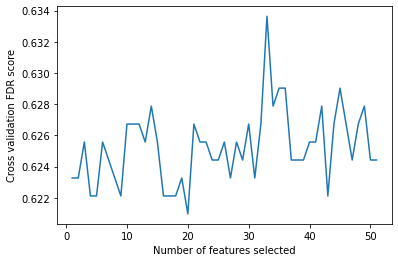

['cardnum_zip_total_7' 'cardnum_merch_total_7' 'cardnum_merch_total_14'
 'cardnum_merch_total_3' 'cardnum_state_total_3' 'cardnum_zip_total_14'
 'cardnum_state_total_1' 'cardnum_zip_total_1' 'cardnum_merch_total_30'
 'cardnum_state_total_14' 'cardnum_zip_total_30' 'cardnum_merch_total_0'
 'cardnum_state_total_0' 'cardnum_zip_max_14' 'cardnum_zip_total_0'
 'cardnum_state_max_7' 'cardnum_zip_max_7' 'cardnum_state_max_14'
 'cardnum_merch_max_30' 'cardnum_zip_max_3' 'cardnum_merch_max_3'
 'Cardnum_total_3' 'cardnum_merch_max_7' 'Cardnum_total_7'
 'merchnum_zip_total_1' 'cardnum_zip_max_1' 'cardnum_state_max_30'
 'cardnum_state_max_1' 'Merchnum_total_0' 'merchnum_zip_max_0'
 'merchnum_state_total_1' 'Cardnum_total_1' 'Merchnum_total_1'
 'Cardnum_total_0' 'cardnum_state_max_0' 'cardnum_zip_max_0'
 'merchnum_zip_max_1' 'cardnum_merch_max_0' 'merchnum_zip_max_3'
 'merchnum_state_max_1' 'Merchnum_max_1' 'Cardnum_max_0' 'Cardnum_max_7'
 'Cardnum_max_3' 'Cardnum_max_1' 'Cardnum_total_14' 'merchnu

In [39]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation FDR score")
plt.plot(range(1, len(rfecv_logreg.grid_scores_) + 1), rfecv_logreg.grid_scores_)
plt.show()

var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv_logreg.ranking_), X_data)),
                            columns = ['ranking', 'variable'])

scores_csv = pd.DataFrame(rfecv_logreg.grid_scores_,columns = ['Score'])

features_chosen_wrapper = X_data.columns[rfecv_logreg.support_].values
print(features_chosen_wrapper)

In [40]:
# Run RFE without CV for better ranking
from sklearn.feature_selection import RFE

start_time = pd.datetime.now()
print("started at ",start_time)

log_reg = LogisticRegression()

rfe_logreg = RFE(estimator=log_reg, step=1, n_features_to_select=1)
rfe_logreg.fit(X_data[features_chosen_wrapper], Y_labels)
end_time = pd.datetime.now()
print('duration: ', end_time - start_time)

started at  2021-05-01 13:09:44.598459
duration:  0:00:47.694825


In [41]:
var_selected_rfe = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfe_logreg.ranking_), X_data[features_chosen_wrapper])),
                            columns = ['ranking', 'variable'])

selected_columns_rfe = X_data[features_chosen_wrapper].columns[rfe_logreg.support_].values

In [42]:
var_selected_rfe.head()

,ranking,variable
0,1,cardnum_state_total_3
1,2,cardnum_zip_total_14
2,3,cardnum_merch_total_3
3,4,merchnum_state_total_1
4,5,cardnum_state_max_0


In [43]:
# The top 30 features from the RFE method
RFE_wrapper_columns = var_selected_rfe.variable.values[:30]
RFE_wrapper_columns

array(['cardnum_state_total_3', 'cardnum_zip_total_14',
       'cardnum_merch_total_3', 'merchnum_state_total_1',
       'cardnum_state_max_0', 'cardnum_state_avg_0',
       'cardnum_merch_avg_3', 'cardnum_merch_max_3', 'Merchnum_max_1',
       'merchnum_zip_max_1', 'merchnum_zip_max_3', 'cardnum_zip_max_1',
       'cardnum_zip_max_3', 'cardnum_merch_max_7', 'cardnum_merch_max_30',
       'cardnum_merch_total_14', 'cardnum_merch_total_30',
       'cardnum_merch_total_0', 'cardnum_zip_total_0', 'Cardnum_total_1',
       'cardnum_zip_max_7', 'cardnum_zip_max_14', 'cardnum_merch_total_7',
       'cardnum_state_avg_1', 'Cardnum_total_14', 'Cardnum_max_14',
       'cardnum_state_total_14', 'merchnum_zip_total_1',
       'Cardnum_total_7', 'Cardnum_total_0'], dtype=object)

### Combine 2 ranking

In [55]:
df_importance_scores['Tree_rank']=df_importance_scores['AVG_Rank'].rank(method='max', ascending=True)

In [56]:
tree_rank=df_importance_scores[['Var_Tree','Tree_rank']]

In [57]:
var_rank=pd.concat([tree_rank.set_index('Var_Tree'),var_selected_rfe.set_index('variable')],axis=1)

In [58]:
#Tree models have 80 variables but RVECV only choose 62 variables
var_rank=var_rank.fillna(63)

In [59]:
var_rank['Avg_rank']=var_rank[['Tree_rank', 'ranking']].mean(axis=1)
var_rank=var_rank.reset_index().sort_values(['Avg_rank'])
var_rank=var_rank.rename(columns={"index": "Variable","ranking": "RFE_rank"})

In [63]:
var_rank=var_rank.reset_index(drop=True)
var_rank

,Variable,Tree_rank,RFE_rank,Avg_rank
0,cardnum_zip_total_14,4.0,2.0,3.0
1,cardnum_state_total_3,19.0,1.0,10.0
2,Cardnum_total_1,1.0,20.0,10.5
3,cardnum_merch_total_7,2.0,23.0,12.5
4,cardnum_merch_total_14,11.0,16.0,13.5
5,cardnum_zip_max_14,6.0,22.0,14.0
6,Cardnum_max_14,3.0,26.0,14.5
7,merchnum_state_total_1,28.0,4.0,16.0
8,cardnum_merch_total_3,30.0,3.0,16.5
9,merchnum_zip_total_1,5.0,28.0,16.5


In [65]:
var_rank.to_csv('var_rank.csv',index=False)

In [66]:
## choose 30 columns
final_wrapper_columns = var_rank.Variable[:30]
final_wrapper_columns

0       cardnum_zip_total_14
1      cardnum_state_total_3
2            Cardnum_total_1
3      cardnum_merch_total_7
4     cardnum_merch_total_14
5         cardnum_zip_max_14
6             Cardnum_max_14
7     merchnum_state_total_1
8      cardnum_merch_total_3
9       merchnum_zip_total_1
10      cardnum_state_max_30
11           Cardnum_total_0
12        merchnum_zip_max_3
13    cardnum_merch_total_30
14          Cardnum_total_14
15      cardnum_merch_max_30
16       cardnum_merch_max_3
17    cardnum_state_total_14
18       cardnum_zip_total_1
19       cardnum_merch_avg_3
20        merchnum_zip_max_1
21             Cardnum_max_7
22      merchnum_zip_total_7
23     cardnum_merch_total_0
24      merchnum_state_max_1
25           Cardnum_total_7
26        cardnum_zip_max_30
27      cardnum_state_max_14
28       cardnum_state_max_0
29           Cardnum_total_3
Name: Variable, dtype: object

In [67]:
### 30 variables

X_models = df_modeling_scaled[final_wrapper_columns]
Y_labels = df_modeling_scaled['Fraud'] 
X_oot_orig = df_oot[final_wrapper_columns]
Y_oot_orig = df_oot['Fraud']

### Neural Networks

In [68]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# import regularizer
from keras.regularizers import l1 ,l2
from sklearn.utils import resample

In [69]:
def recall_m(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

METRICS = [keras.metrics.BinaryAccuracy(name='accuracy'), f1_score, precision_m, recall_m, tf.keras.metrics.AUC()]

In [72]:
from warnings import filterwarnings # this is to ignore convergence warnings

filterwarnings('ignore')

# Neural Net 1 -- 30 variable
start_time = pd.datetime.now()

FDR3 = pd.DataFrame(columns=['trn', 'tst', 'oot'])
for niter in range(10):
    X_trn,X_tst,Y_trn,Y_tst=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3,random_state=niter)
    
    
    #hyperparameter tuning----------------------------------------------------------
    num_hidden = 30
    adam_par = Adam(learning_rate= 0.01)
    class_weights = {0: 0.5, 1: 8.5}
    nn_model = Sequential()
    nn_model.add(Dense(num_hidden, input_dim=X_models.shape[1], activation='relu'))
    nn_model.add(Dense(1, activation='sigmoid'))
    nn_model.compile(loss='binary_crossentropy', optimizer=adam_par, metrics=[METRICS])
    #----------------------------------------------------------------------------
    
    X_trn_array=X_trn.values
    X_tst_array=X_tst.values
    X_oot_array=X_oot_orig.values
    Y_trn_array=Y_trn.values
    Y_tst_array=Y_tst.values
    Y_oot_array=Y_oot_orig.values
    
    X_oot=X_oot_orig.copy()
    X_trn_eval=X_trn.copy()
    X_tst_eval=X_tst.copy()
    X_oot_eval=X_oot.copy()
    
    #hyperparameter tuning----------------------------------------------------------
    history=nn_model.fit(X_trn,Y_trn.values.ravel(), epochs=20, batch_size=500, verbose=0,class_weight=class_weights)
    #----------------------------------------------------------------------------
    
    predictions=nn_model.predict_proba(X_trn)
    X_trn_eval['predicted']=predictions
    X_trn_eval['Fraud']=Y_trn
    topRows=int(round(X_trn_eval.shape[0]*0.03))
    temp=X_trn_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'trn']=sum(needed)/sum(X_trn_eval.loc[:,'Fraud'])
    
    predictions=nn_model.predict_proba(X_tst)
    
    X_tst_eval['predicted']=predictions
    X_tst_eval['Fraud']=Y_tst
    topRows=int(round(X_tst_eval.shape[0]*0.03))
    temp=X_tst_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'tst']=sum(needed)/sum(X_tst_eval.loc[:,'Fraud'])
    
    predictions=nn_model.predict_proba(X_oot)
    
    X_oot_eval['predicted']=predictions
    X_oot_eval['Fraud']=Y_oot_orig
    topRows=int(round(X_oot_eval.shape[0]*0.03))
    temp=X_oot_eval.sort_values('predicted',ascending=False).head(topRows)
    needed=temp.loc[:,'Fraud']
    FDR3.loc[niter,'oot']=sum(needed)/sum(X_oot_eval.loc[:,'Fraud'])
    print(niter, FDR3.loc[niter,'trn'],FDR3.loc[niter,'tst'],FDR3.loc[niter,'oot'])
print(FDR3.mean())
print('duration: ', pd.datetime.now() - start_time)

0 0.8544839255499154 0.7689530685920578 0.6145251396648045
1 0.8538961038961039 0.7619047619047619 0.5195530726256983
2 0.8344262295081967 0.7906976744186046 0.6201117318435754
3 0.8384991843393148 0.8392156862745098 0.6256983240223464
4 0.8447712418300654 0.8515625 0.6145251396648045
5 0.841845140032949 0.8390804597701149 0.5698324022346368
6 0.8564437194127243 0.7803921568627451 0.5642458100558659
7 0.8488372093023255 0.7819548872180451 0.5195530726256983
8 0.8451178451178452 0.8029197080291971 0.5865921787709497
9 0.8503937007874016 0.8497854077253219 0.6424581005586593
trn    0.846871
tst    0.806647
oot    0.587709
dtype: float64
duration:  0:00:43.862098
